In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'HDFCBANK.NS'  # Stock symbol in uppercase

stock_data = yf.download(symbol, start=start, end=end)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000,1433.425415,8455721
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024,1427.302979,7413518
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951,1441.813354,3686941
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951,1479.655518,8834516
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000,1484.283325,4814595
...,...,...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1463.988281,7158813
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1454.877319,7598923
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1467.025391,5768847


In [3]:
stock_data =stock_data[['Open','High','Low','Close']]
stock_data

,Open,High,Low,Close
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976


In [4]:
column ='Close'

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms= MinMaxScaler()
data = Ms.fit_transform(stock_data[[column]])
print("Length of the data {} and Shape of data {}".format(len(data),data.shape))

Length of the data 143 and Shape of data (143, 1)


In [6]:
training_size = round(len(data)*0.80)
print("Training data size:", training_size)
X_train=data[:training_size]
X_test=data[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

Y_train=data[:training_size]
Y_test=data[training_size:]
print("Y_train length:",Y_train.shape)
print("Y_test length:",Y_test.shape)

Training data size: 114
X_train length: (114, 1)
X_test length: (29, 1)
Y_train length: (114, 1)
Y_test length: (29, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
trends = ['n','t','c','ct']
orders = [(0,0,1),(0,0,2)]

from statsmodels.tsa.arima.model import ARIMA
for td in trends:
    model = ARIMA(X_train, order=(0,0,10),trend = td,)
    model_fit=model.fit()
    
    test_pred = model_fit.predict(len(X_train),len(data)-1)
    test_pred
    
    from sklearn.metrics import r2_score
    mse = mean_squared_error(Y_test,test_pred,squared =False)
    
    from functions import rmsemape
    print("Trend ={}".format(td))
    rmsemape(Y_test,test_pred)
    print("*****************")

C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend =n
RMSE-Testset: 0.3351966293236443
maPe-Testset: 0.9182969569346324
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend =t
RMSE-Testset: 0.4696007579721593
maPe-Testset: 2.487866094599541
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend =c
RMSE-Testset: 0.16941410522198916
maPe-Testset: 1.072848097071235
*****************
Trend =ct
RMSE-Testset: 0.2739022981348686
maPe-Testset: 1.6141501473575075
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(test_pred)

29

In [10]:
td = "n"
model = ARIMA(X_train, order =(0,0,10),trend = td)
model_fit = model.fit()
test_pred = model_fit.predict(len(X_train),len(data)-1)
test_pred

from sklearn.metrics import r2_score
mse = mean_squared_error(Y_test,test_pred,squared =False)

from functions import rmsemape
print("Trend ={}".format(td))
rmsemape(Y_test,test_pred)
print("*****************")

Trend =n
RMSE-Testset: 0.3351966293236443
maPe-Testset: 0.9182969569346324
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


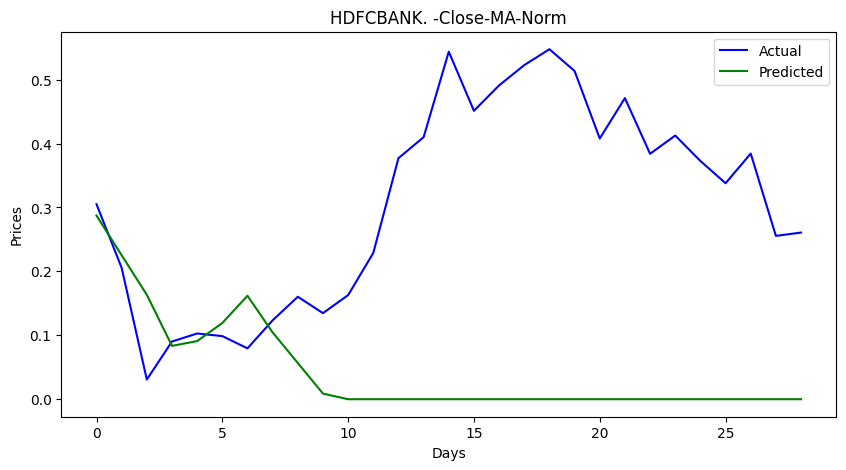

In [11]:
from functions import graph
graph(Y_test,test_pred,"Actual","Predicted","HDFCBANK. -Close-MA-Norm","Days","Prices")

In [12]:
from functions import conversionSingle
aTestNormTable = conversionSingle(Y_test,['Close'])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
# actual_stock_price_test_ori
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,['Close'])
actual_stock_price_test_oriA

,Close
0,1500.099976
1,1473.050049
2,1425.650024
3,1441.800049
4,1445.199951
5,1444.099976
6,1438.900024
7,1450.800049
8,1460.800049
9,1453.849976


In [13]:
# from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(test_pred,['Close'])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,['Close'])

In [14]:
predicted_stock_price_test_oriP

,Close
0,1495.277442
1,1478.410478
2,1461.636409
3,1439.958966
4,1441.97239
5,1449.6657
6,1461.219445
7,1445.659669
8,1432.683365
9,1419.681679


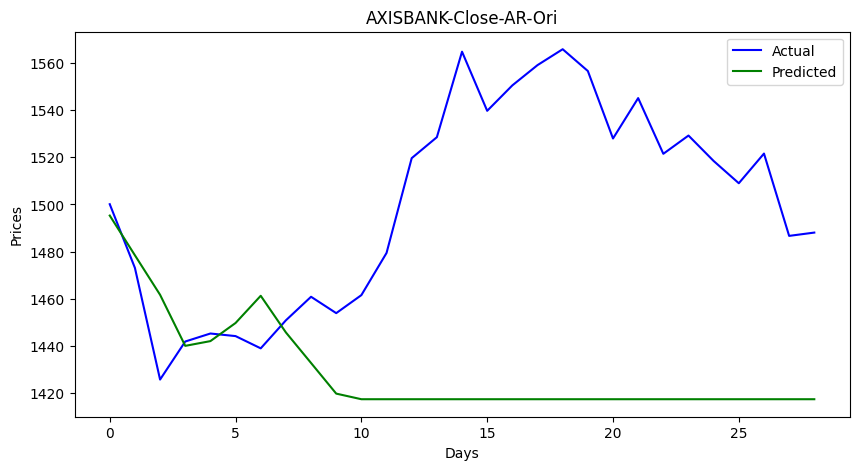

In [15]:
# from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [16]:
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)


RMSE-Testset: 90.97233246439126
maPe-Testset: 0.049509269409312974


In [17]:
forecast=model_fit.predict(len(data), len(data)+30)
forecast

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [19]:
forecast_stock_price_test_oriF

,Closefore
0,1417.300049
1,1417.300049
2,1417.300049
3,1417.300049
4,1417.300049
5,1417.300049
6,1417.300049
7,1417.300049
8,1417.300049
9,1417.300049


In [20]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)


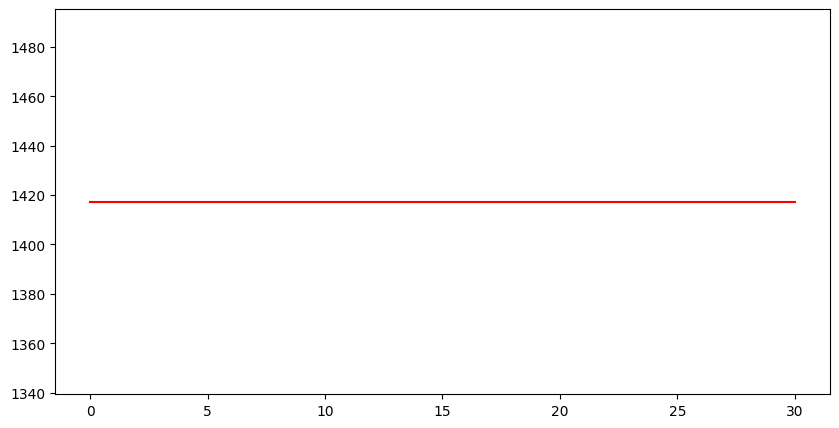

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")